# Calculation of Regression Beta

In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns
import yfinance as yf 
import datetime as dt
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Please provide these Input Sheets

In [52]:
stock = 'POLYCAB.NS' # Tell me the stock you want to analyze the beta
market = '^NSEI' # Tell me the market you want to compare the stock to
start = '2019-01-01' # Start date
# """""frequency = '1d' # Frequency of the data. 1d means daily data.
# periods = '1y' # Period of the data. 1y means 1 year data."""""

end = dt.datetime.now().strftime('%Y-%m-%d') # End date means today.


# Fetching the data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Beta of POLYCAB.NS for 1 year daily data is 1.1515722469788554
Beta of POLYCAB.NS for 2 years daily data is 1.0208797925271809
Beta of POLYCAB.NS for 2 years weekly data is 0.8681844230820007
Beta of POLYCAB.NS for 3 years weekly data is 0.8906107701365271
Beta of POLYCAB.NS for 5 years weekly data is 0.8679798081860077
Beta of POLYCAB.NS for 5 years monthly data is 0.8797668585075453


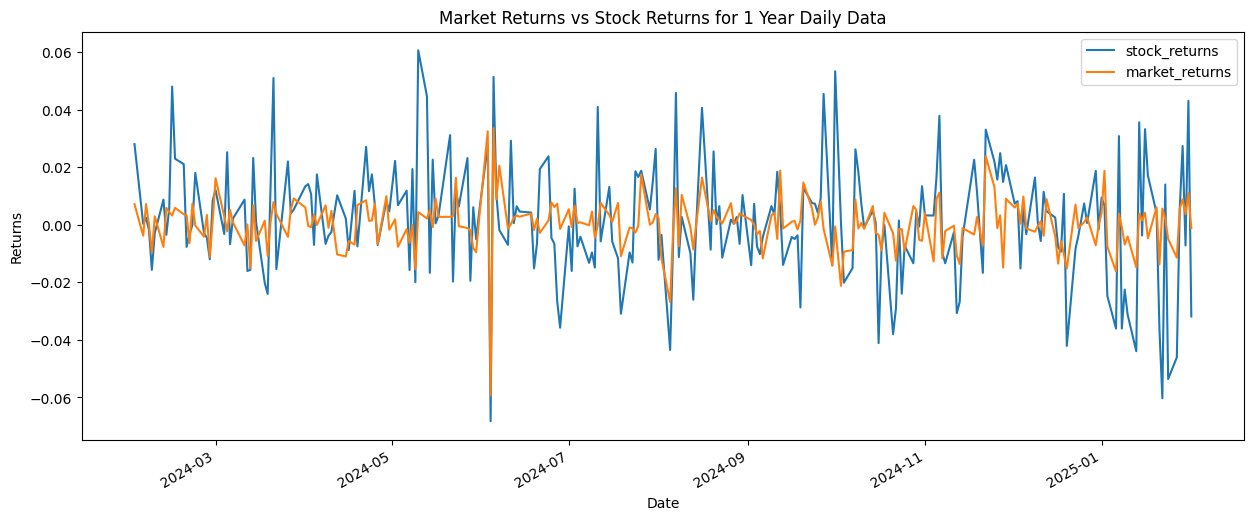

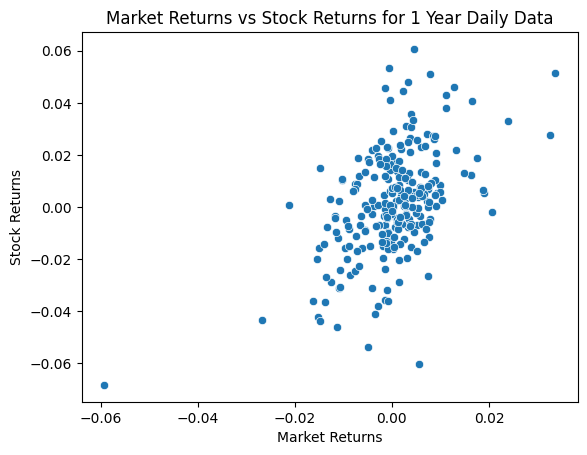

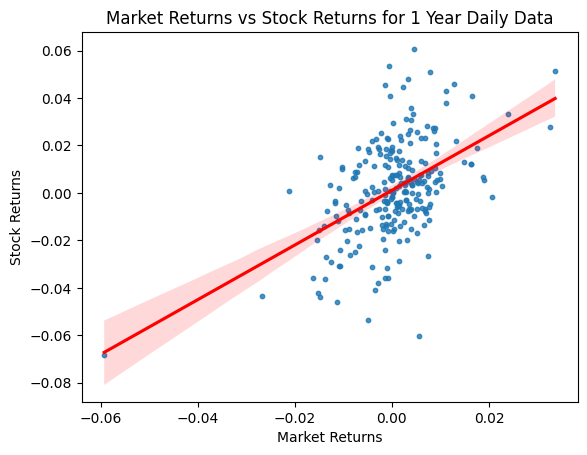

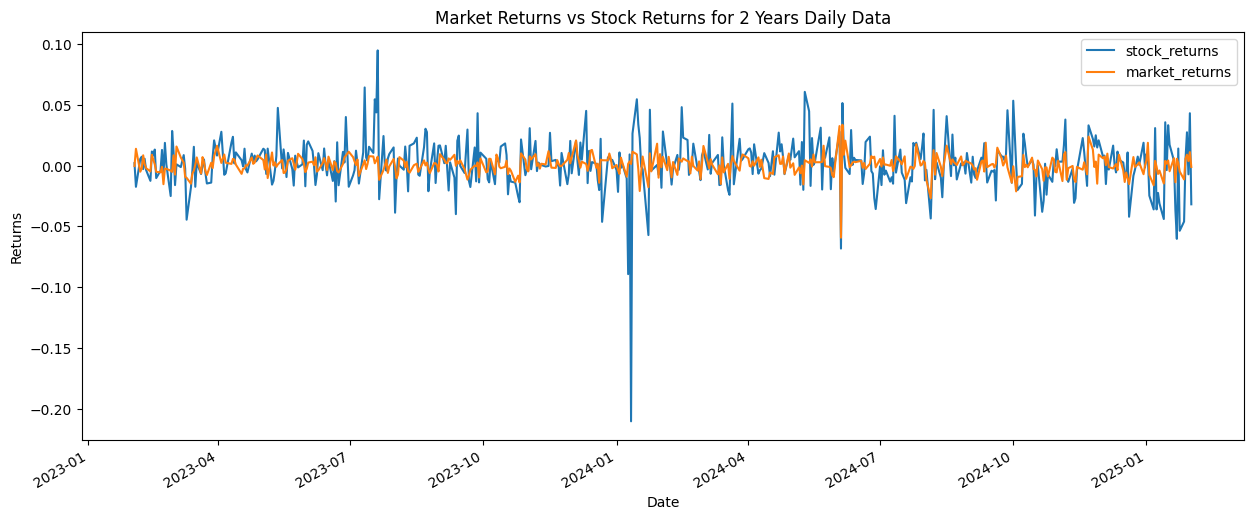

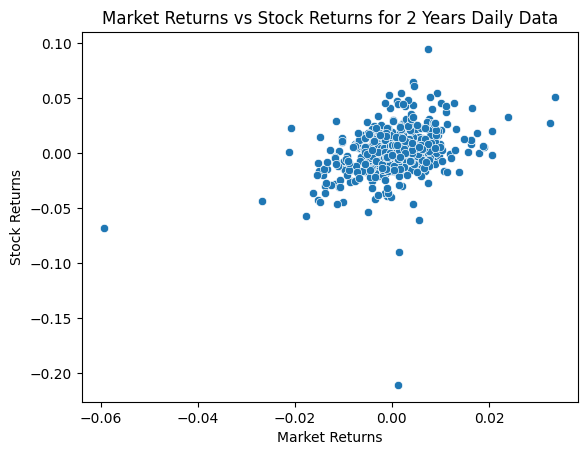

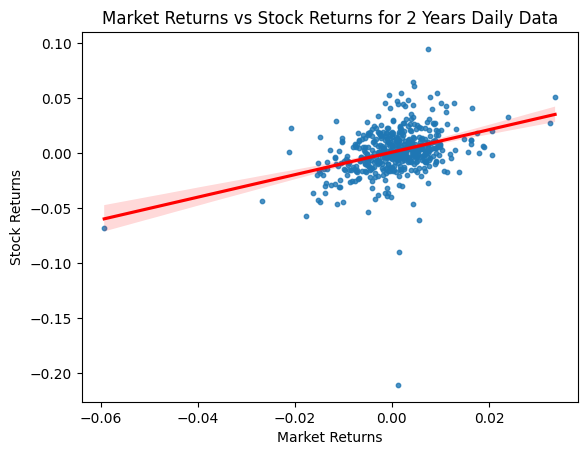

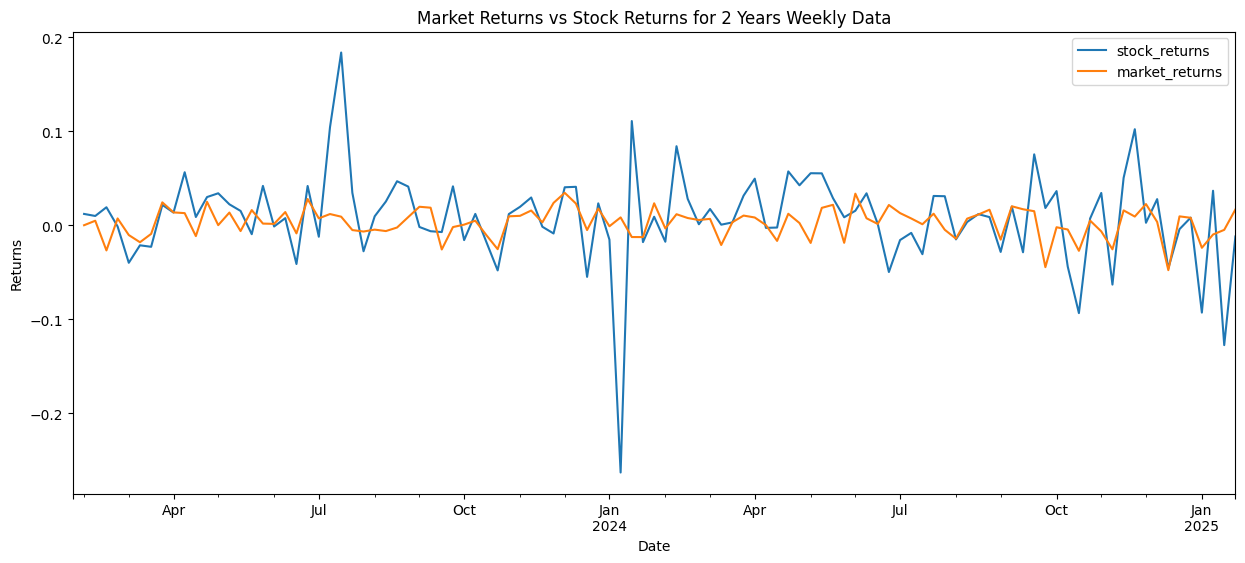

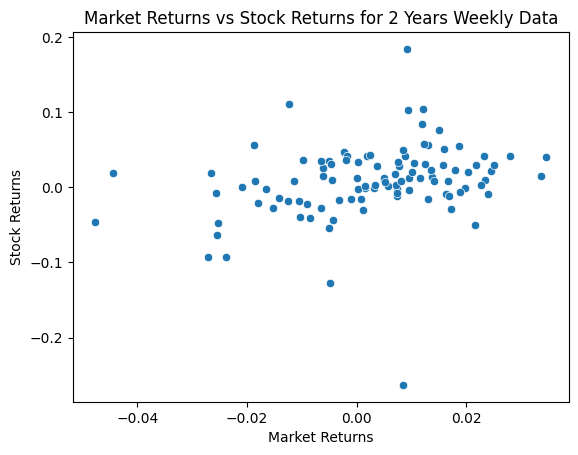

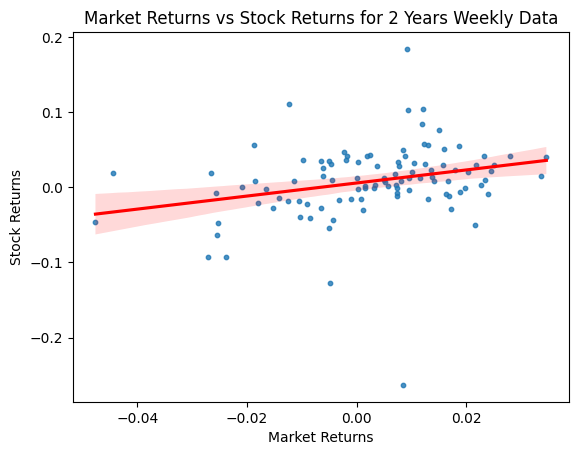

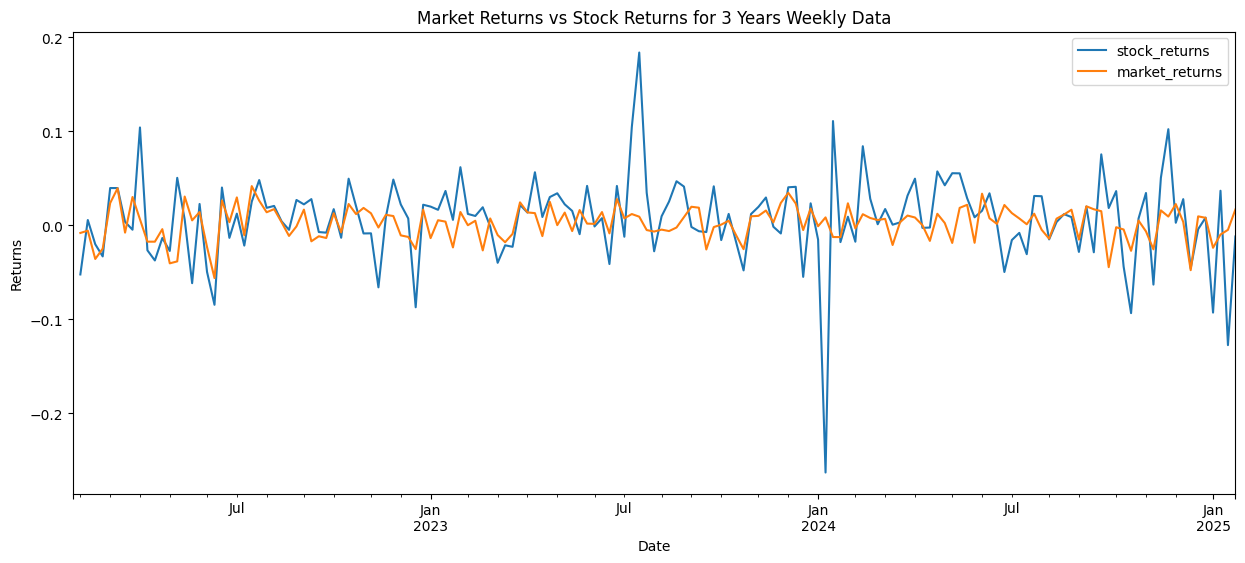

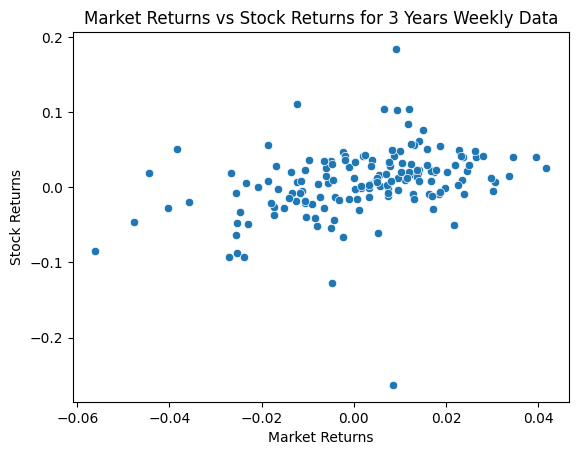

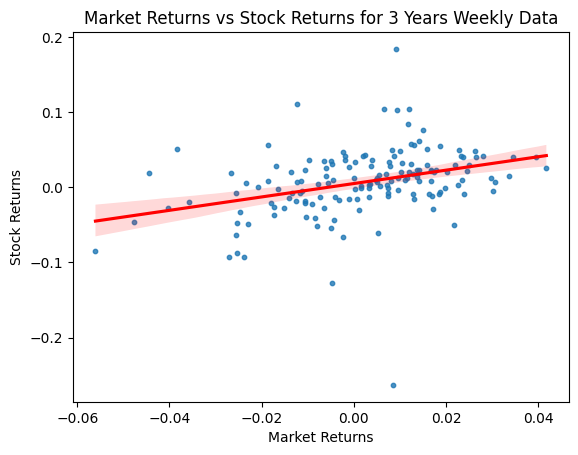

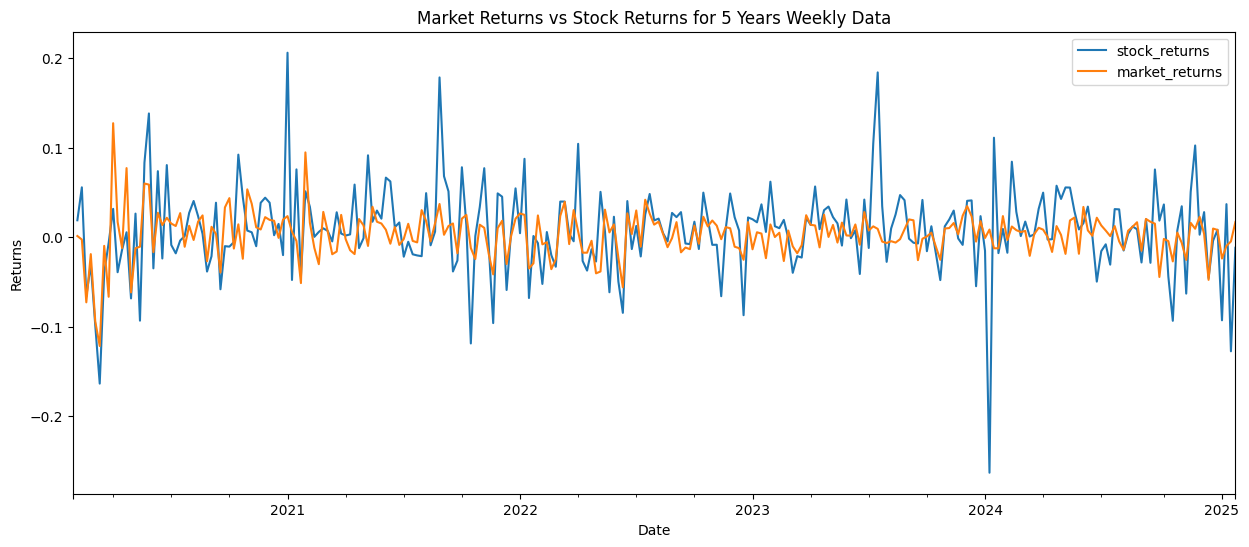

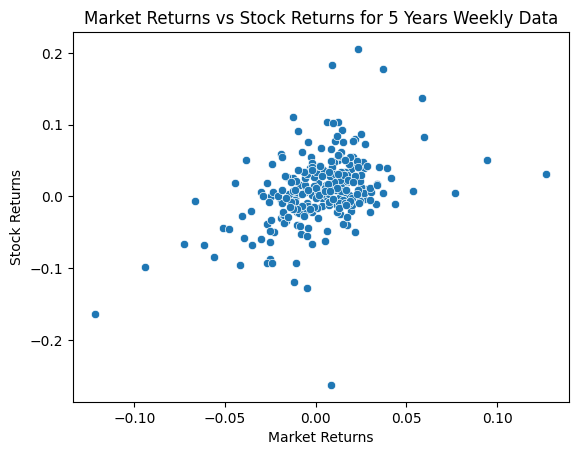

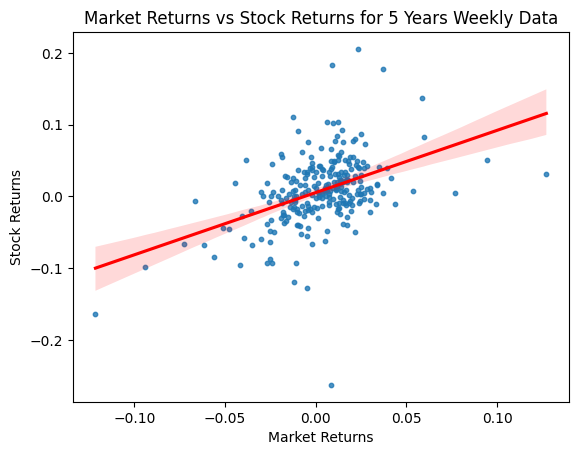

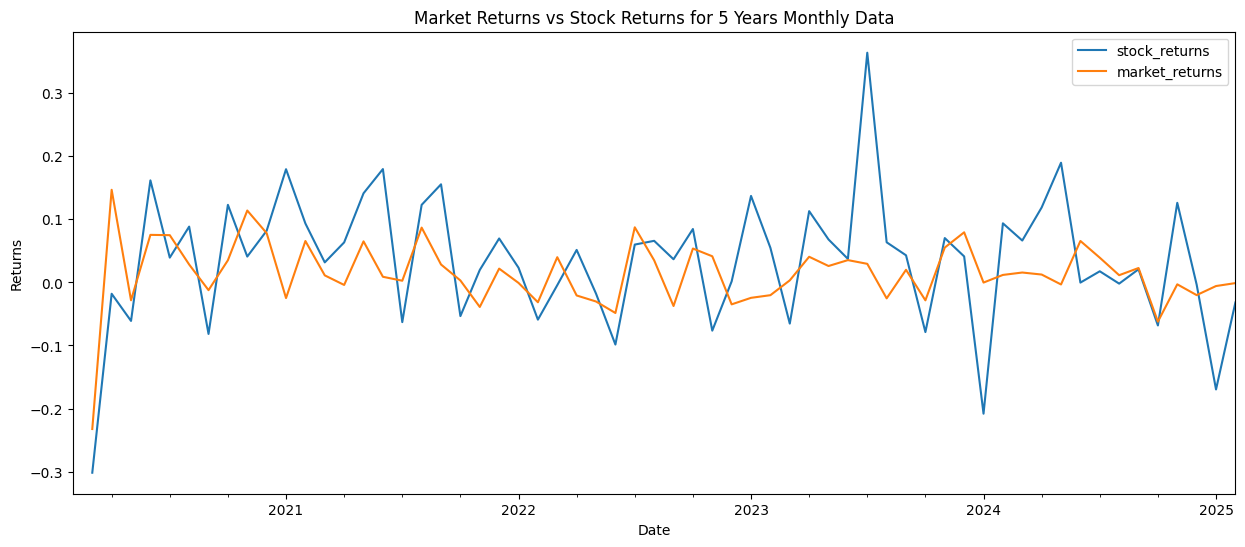

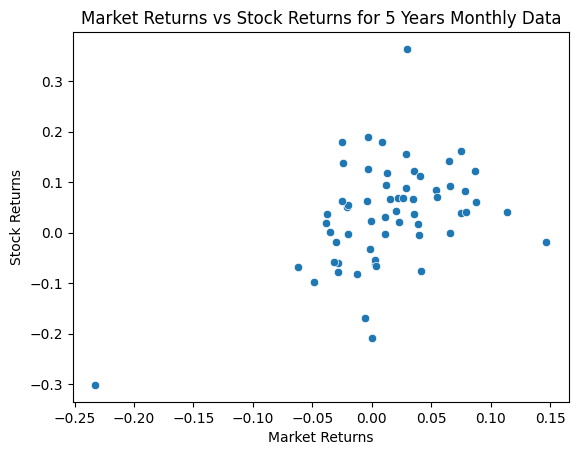

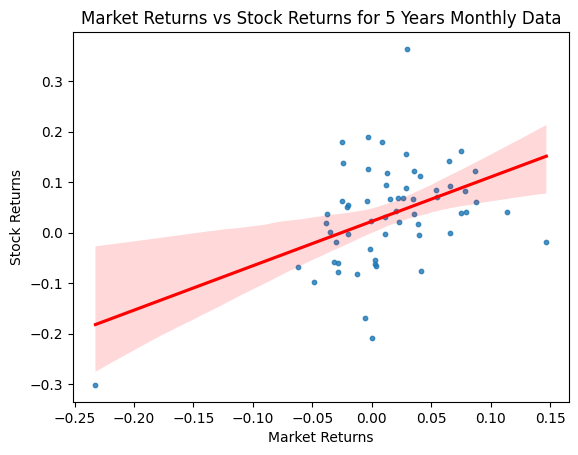

In [53]:
# Fetch data for 1 year daily data
stockdata_1yd = yf.download(stock, interval='1d', period='1y') # Fetch 1 year daily data
marketdata_1yd = yf.download(market, interval='1d', period='1y') # Fetch 1 year daily data

# Fetch data for 2 years daily data
stockdata_2yd = yf.download(stock, interval='1d', period='2y') # Fetch 2 years daily data
marketdata_2yd = yf.download(market, interval='1d', period='2y') # Fetch 2 years daily data

# Fetch data for 2 years weekly data
stockdata_2ywk = yf.download(stock, interval='1wk', period='2y') # Fetch 2 years weekly data
marketdata_2ywk = yf.download(market, interval='1wk', period='2y') # Fetch 2 years weekly data

# Fetch data for 3 years weekly data
stockdata_3ywk = yf.download(stock, interval='1wk', period='3y') # Fetch 3 years weekly data
marketdata_3ywk = yf.download(market, interval='1wk', period='3y') # Fetch 3 years weekly data

# Fetch data for 5 years weekly data 
stockdata_5ywk = yf.download(stock, interval='1wk', period='5y') # Fetch 5 years weekly data
marketdata_5ywk = yf.download(market, interval='1wk', period='5y') # Fetch 5 years weekly data

# Fetch data for 5 years monthly data
stockdata_5ym = yf.download(stock, interval='1mo', period='5y') # Fetch 5 years monthly data
marketdata_5ym = yf.download(market, interval='1mo', period='5y') # Fetch 5 years monthly data

# Function to calculate beta
def calculate_beta(stockdata, marketdata, stock, market): # Function to calculate beta
    stockdata.dropna(inplace=True) # Drop missing values
    marketdata.dropna(inplace=True) # Drop missing values
    stockdata.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True) # Drop unnecessary columns
    marketdata.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True) # Drop unnecessary columns
    stockdata.rename(columns={'Adj Close': stock}, inplace=True) # Rename column
    marketdata.rename(columns={'Adj Close': market}, inplace=True) # Rename column
    data = pd.concat([stockdata, marketdata], axis=1) # Concatenate data
    data.dropna(inplace=True) # Drop missing values
    data['stock_returns'] = data[stock].pct_change() # Calculate stock returns
    data['market_returns'] = data[market].pct_change()  # Calculate market returns
    covmat = np.cov(data['stock_returns'][1:], data['market_returns'][1:]) # Calculate covariance matrix
    beta = covmat[0,1]/covmat[1,1] # Calculate beta
    return beta, data # Return beta and data

# Calculate betas
beta_1yd, data_1yd = calculate_beta(stockdata_1yd, marketdata_1yd, stock, market) # Calculate beta for 1 year daily data
beta_2yd, data_2yd = calculate_beta(stockdata_2yd, marketdata_2yd, stock, market) # Calculate beta for 2 years daily data
beta_2ywk, data_2ywk = calculate_beta(stockdata_2ywk, marketdata_2ywk, stock, market) # Calculate beta for 2 years weekly data
beta_3ywk, data_3ywk = calculate_beta(stockdata_3ywk, marketdata_3ywk, stock, market) # Calculate beta for 3 years weekly data
beta_5ywk, data_5ywk = calculate_beta(stockdata_5ywk, marketdata_5ywk, stock, market) # Calculate beta for 5 years weekly data
beta_5ym, data_5ym = calculate_beta(stockdata_5ym, marketdata_5ym, stock, market) # Calculate beta for 5 years monthly data

# Print betas
print(f"Beta of {stock} for 1 year daily data is {beta_1yd}") # Print beta for 1 year daily data
print(f"Beta of {stock} for 2 years daily data is {beta_2yd}") # Print beta for 2 years daily data
print(f"Beta of {stock} for 2 years weekly data is {beta_2ywk}") # Print beta for 2 years weekly data
print(f"Beta of {stock} for 3 years weekly data is {beta_3ywk}") # Print beta for 3 years weekly data
print(f"Beta of {stock} for 5 years weekly data is {beta_5ywk}") # Print beta for 5 years weekly data
print(f"Beta of {stock} for 5 years monthly data is {beta_5ym}") #

# Plotting
def plot_data(data, title): # Function to plot data
    data[['stock_returns', 'market_returns']].plot(figsize=(15, 6)) # Plot data
    plt.title(title) # Set title
    plt.xlabel('Date')   # Set x-axis label
    plt.ylabel('Returns') # Set y-axis label
    plt.legend(['stock_returns', 'market_returns']) # Set legend
    plt.show() # Show plot
# Plot data
    sns.scatterplot(x='market_returns', y='stock_returns', data=data) # Scatter plot
    plt.xlabel('Market Returns') # Set x-axis label
    plt.ylabel('Stock Returns') # Set y-axis label
    plt.title(title) # Set title
    plt.show() # Show plot
 # Plot data
    sns.regplot(x='market_returns', y='stock_returns', data=data, scatter_kws={'s':10}, line_kws={'color':'red'}) # Regression plot
    plt.xlabel('Market Returns') # Set x-axis label
    plt.ylabel('Stock Returns') # Set y-axis label
    plt.title(title)# Set title
    plt.show() # Show Plot
    # Calculate alpha and beta


# Plot data
plot_data(data_1yd, 'Market Returns vs Stock Returns for 1 Year Daily Data') # Plot data for 1 year daily data
plot_data(data_2yd, 'Market Returns vs Stock Returns for 2 Years Daily Data') # Plot data for 2 years daily data
plot_data(data_2ywk, 'Market Returns vs Stock Returns for 2 Years Weekly Data') # Plot data for 2 years weekly data
plot_data(data_3ywk, 'Market Returns vs Stock Returns for 3 Years Weekly Data') # Plot data for 3 years weekly data
plot_data(data_5ywk, 'Market Returns vs Stock Returns for 5 Years Weekly Data') # Plot data for 5 years weekly data
plot_data(data_5ym, 'Market Returns vs Stock Returns for 5 Years Monthly Data') # Plot data for 5 years monthly data